In [86]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D

In [87]:
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

In [88]:
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype = 'float32')

In [89]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
               'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

Label for this image is T


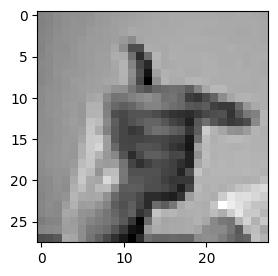

In [91]:
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(3,3))
plt.imshow(train_data[i,1:].reshape(28,28),cmap='gray')
print(f"Label for this image is {class_names[int(train_data[i,0])]}")

Text(0.5, 1.0, 'label')

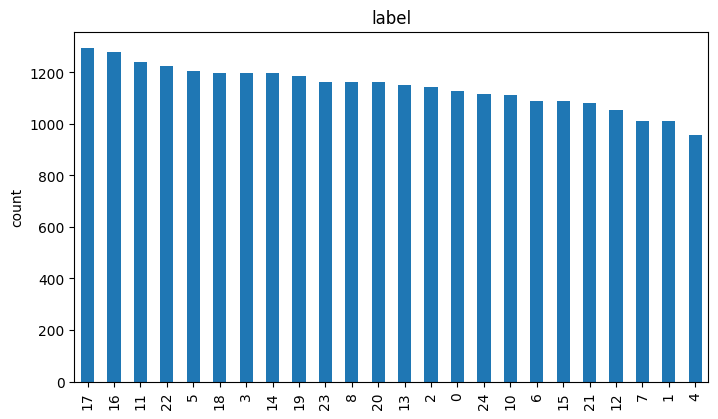

In [92]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('count')
ax1.set_title('label')

In [93]:
x_train = train_data[:,1:]/255
x_test = test_data[:,1:]/255
y_train = train_data[:,0]
y_test = test_data[:,0]

## Machine Learning Models

In [94]:
model1 = LogisticRegression().fit(x_train, y_train)
model2 = RandomForestClassifier().fit(x_train, y_train)
model3 = DecisionTreeClassifier().fit(x_train, y_train)
model4 = SVC().fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
print(f'Logistic Regression Accuracy: {model1.score(x_test, y_test)*100}')
print(f'Random Forest Classifier Accuracy: {model2.score(x_test, y_test)*100}')
print(f'Decision Tree Classifier Accuracy: {model3.score(x_test, y_test)*100}')
print(f'SVM Accuracy: {model4.score(x_test, y_test)*100}')

Logistic Regression Accuracy: 67.40100390407139
Random Forest Classifier Accuracy: 80.89793641940881
Decision Tree Classifier Accuracy: 43.432794199665366
SVM Accuracy: 84.17456776352482


## Neural Network

In [96]:
y_train = to_categorical(y_train, num_classes=25)
y_test = to_categorical(y_test, num_classes=25)

In [97]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [98]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(27455, 28, 28, 1) (27455, 25) (7172, 28, 28, 1) (7172, 25)


In [99]:
seq_model = Sequential()
seq_model.add(Conv2D(32, (2,2), input_shape=(28,28,1), activation='relu'))
seq_model.add(MaxPooling2D(pool_size=(2,2)))
seq_model.add(Dropout(0.2))

seq_model.add(Conv2D(64, (2,2), activation='relu'))
seq_model.add(MaxPooling2D(pool_size=(2,2)))
seq_model.add(Dropout(0.2))

seq_model.add(Conv2D(128, (5,5), activation='relu'))
seq_model.add(MaxPooling2D(pool_size=(2,2)))
seq_model.add(Dropout(0.25))

seq_model.add(Flatten())
seq_model.add(Dense(512,activation='relu'))
seq_model.add(Dense(25, activation='softmax'))

In [100]:
seq_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
seq_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 64)        8256      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 6, 6, 64)         

In [101]:
results = seq_model.fit(x_train, y_train,batch_size=128,epochs=27,verbose=1,validation_data=(x_test,y_test),shuffle=1)

Epoch 1/27
215/215 [==============================] - 39s 178ms/step - loss: 2.2797 - acc: 0.2924 - val_loss: 0.9146 - val_acc: 0.6980
Epoch 2/27
215/215 [==============================] - 40s 186ms/step - loss: 0.6521 - acc: 0.7759 - val_loss: 0.3697 - val_acc: 0.8740
Epoch 3/27
215/215 [==============================] - 39s 183ms/step - loss: 0.3164 - acc: 0.8929 - val_loss: 0.2286 - val_acc: 0.9335
Epoch 4/27
215/215 [==============================] - 38s 177ms/step - loss: 0.1929 - acc: 0.9347 - val_loss: 0.1622 - val_acc: 0.9419
Epoch 5/27
215/215 [==============================] - 38s 178ms/step - loss: 0.1411 - acc: 0.9537 - val_loss: 0.1082 - val_acc: 0.9664
Epoch 6/27
215/215 [==============================] - 37s 173ms/step - loss: 0.1041 - acc: 0.9660 - val_loss: 0.0828 - val_acc: 0.9730
Epoch 7/27
215/215 [==============================] - 38s 175ms/step - loss: 0.0830 - acc: 0.9737 - val_loss: 0.0753 - val_acc: 0.9801
Epoch 8/27
215/215 [==============================] - 3

In [102]:
loss,accuracy = seq_model.evaluate(x=x_test,y=y_test)

225/225 [==============================] - 3s 12ms/step - loss: 0.0557 - acc: 0.9823


In [103]:
print(f"Test Accuracy = {accuracy*100}")

Test Accuracy = 98.22922348976135
